In [8]:
import numpy as np

# Вершини куба
vertices = np.array([
    [-1, -1, -1],
    [-1, -1,  1],
    [-1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1],
    [ 1, -1,  1],
    [ 1,  1, -1],
    [ 1,  1,  1]
])
scale_matrix = np.diag([2, 2, 2])
# Масштабування куба, припустимо, що ми хочемо збільшити його вдвічі
scaled_vertices = np.dot(vertices, scale_matrix)

# Симетричне відображення відносно початку координат
sym_origin_vertices = -scaled_vertices

# Симетричне відображення відносно площини XY (інвертуємо Z координату)
sym_plane_xy_vertices = np.copy(scaled_vertices)
sym_plane_xy_vertices[:, 2] = -sym_plane_xy_vertices[:, 2]

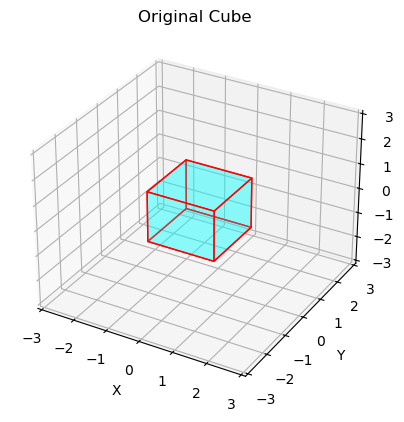

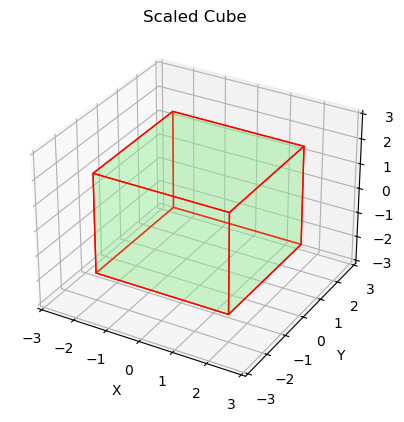

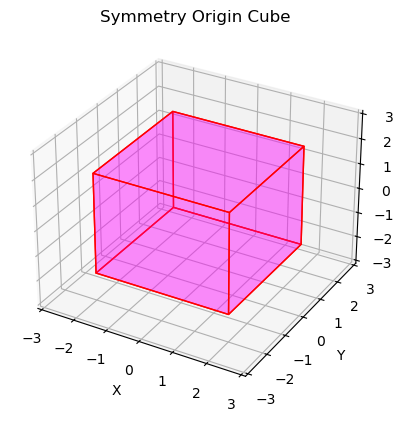

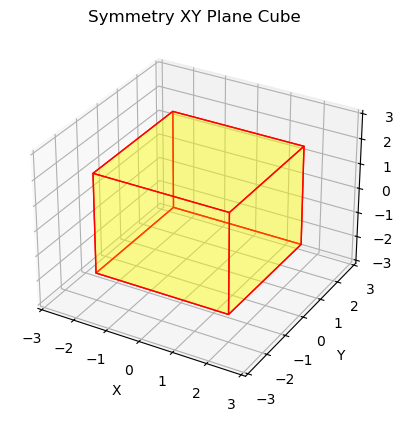

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Функція для побудови куба за вершинами
def plot_cube(vertices, title="Cube", color="cyan"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Список граней куба
    faces = [[vertices[0], vertices[1], vertices[3], vertices[2]],
             [vertices[4], vertices[5], vertices[7], vertices[6]], 
             [vertices[0], vertices[1], vertices[5], vertices[4]], 
             [vertices[2], vertices[3], vertices[7], vertices[6]], 
             [vertices[0], vertices[2], vertices[6], vertices[4]],
             [vertices[1], vertices[3], vertices[7], vertices[5]]]

    # Малювання граней куба
    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='r', alpha=.25))
    
    # Налаштування меж осей для кращого візуального відображення
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# Відображення початкового куба
plot_cube(vertices, "Original Cube", "cyan")

# Відображення масштабованого куба
plot_cube(scaled_vertices, "Scaled Cube", "lightgreen")

# Відображення куба, віддзеркаленого відносно початку координат
plot_cube(sym_origin_vertices, "Symmetry Origin Cube", "magenta")

# Відображення куба, віддзеркаленого відносно площини XY
plot_cube(sym_plane_xy_vertices, "Symmetry XY Plane Cube", "yellow")

plt.show()


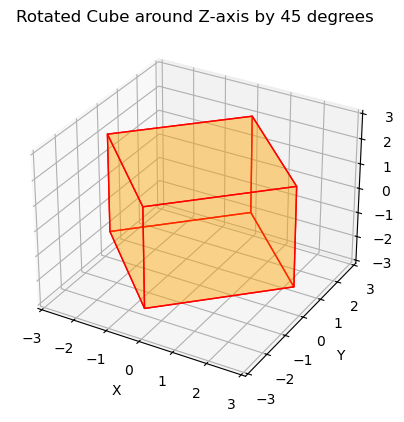

In [3]:
from scipy.spatial.transform import Rotation as R

# Кут повороту в градусах
phi_degrees = 45
# Переведення кута в радіани
phi_radians = np.radians(phi_degrees)

# Створення матриці повороту для повороту навколо осі Z
rotation_matrix = R.from_euler('z', phi_radians).as_matrix()

# Поворот масштабованого куба
rotated_scaled_vertices = np.dot(scaled_vertices, rotation_matrix)

# Відображення результату
plot_cube(rotated_scaled_vertices, f"Rotated Cube around Z-axis by {phi_degrees} degrees", "orange")

plt.show()


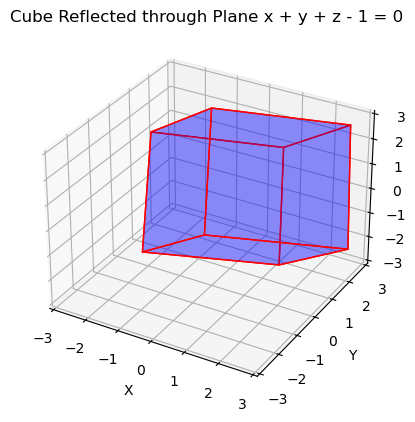

In [4]:
# Коефіцієнти рівняння площини x + y + z - 1 = 0
A, B, C, D = 1, 1, 1, -1

# Функція для симетрії відносно площини
def reflect_vertices_through_plane(vertices, A, B, C, D):
    reflected_vertices = []
    for vertex in vertices:
        x, y, z = vertex
        factor = 2 * (A*x + B*y + C*z + D) / (A**2 + B**2 + C**2)
        x_reflected = x - factor * A
        y_reflected = y - factor * B
        z_reflected = z - factor * C
        reflected_vertices.append([x_reflected, y_reflected, z_reflected])
    return np.array(reflected_vertices)

# Відображення масштабованого куба відносно площини x + y + z - 1 = 0
reflected_vertices = reflect_vertices_through_plane(scaled_vertices, A, B, C, D)

# Відображення результату
plot_cube(reflected_vertices, "Cube Reflected through Plane x + y + z - 1 = 0", "blue")

plt.show()
